# Pandas

Pandas is an open source library tabular heterogeneous data manipulation.
The core structures are 'Series' and DataFrame which can be seen as a collections of Series. In addition `pandas` provides the necessary means for data cleaning and prepation. `pandas` uses NumPy arrray structure as an extension type with methods for conversion in both directions

A major difference between numpy arrays and `pandas`. Series and DataFrame is in the way that pandas indices are used. In NumPy the index is implicitly assigned 0..(n-1) whereas `pandas` Series and DataFrame have similar behvaviour but in addition allow labels as indices. In addition the indices are preserved after applying operations.

Many parallels can be drawn between pandas and tidyverse R package. In terms of data structure, Series and DataFrame have similar behaviour but in addition allow labels as indices. In addition the indices are preserved after applying operations.

Many parallels can be drawn between `pandas` and `tidyverse` R package. In terms of data structure, Series and DataFrame can be viewed as vectors and data.frame/tibble respectively. Futhermore, in terms of functionality most data manipulation operations available in tidyverse have a counterparts in pandas


In [1]:
# convention
import pandas as pd
import numpy as np

from numpy.random import default_rng
rng = default_rng()

## Series

`Series` is a sequence of value, possibly of heterogeneous types. You can create Series with the pd.Series function

In [2]:
print(pd.Series([3, 5, 7]))
print(pd.Series({'a':3, 'b':5, 'c':7}))
print(pd.Series([3, 5, 7], index = ['a', 'b', 'c']))
print(pd.Series([3, 5, 7]))

0    3
1    5
2    7
dtype: int64
a    3
b    5
c    7
dtype: int64
a    3
b    5
c    7
dtype: int64
0    3
1    5
2    7
dtype: int64


Input data to pd.Series is not copied by default. In the following scenario an update to Series `s` propogates to NumPy array `arr`:

In [3]:
arr = np.array(range(3, 7+1, 2))
s = pd.Series(arr, copy = False) # default copy = False
print(s)
s[1] = -1 # set value s[1] to -1
# Series, besides the ordered indices 0.. (n-1), 
# may also be viewed as a dictionary where values are
# accessed based on mapped indices to values;
s

0    3
1    5
2    7
dtype: int32


0    3
1   -1
2    7
dtype: int32

In [4]:
s = pd.Series({'a':3, 'b':5, 'c':7})
s[1] == s['b']
s

a    3
b    5
c    7
dtype: int64

Operations between Series are carried out based on matching indices as opposed to element-wise:

In [5]:
s1 = pd.Series({"a":3, "b":5, "c":2})
s2 = pd.Series({"b":3, "a": 4, "c":2})
s1 + s2

a    7
b    8
c    4
dtype: int64

and they don't have to be the same size

In [6]:
s3 = pd.Series({"b":3, "a":5, "c":2, "d": 10})
s1 + s3

a    8.0
b    8.0
c    4.0
d    NaN
dtype: float64

Index membership:

In [7]:
print(s1)
"b" in s1

a    3
b    5
c    2
dtype: int64


True

In contrast to NumPy arrays, and R vectors, being homogenous containers, Series may take up values of different types

In [8]:
s = pd.Series({'a':3, 'b':5, 'c':'7'})
print(s.dtype)
[type(v) for v in s]


object


[int, int, str]

### Series methods and submodules

An exhaustive review of Series' methods and submodules is beyond the scope of this course. Here we only review several common uses

['apple' 'watermelon' 'orange' 'pear' 'cherry' 'strawberry']
6
         self  other
b  watermelon   kiwi
f  strawberry  grape
a         apple
b    watermelon
dtype: object


Axes(0.125,0.11;0.775x0.77)
a     apple
c    orange
d      pear
e    cherry
dtype: object
0.1    2.302585
0.2    1.609438
0.3    1.203973
0.4    0.916291
0.5    0.693147
         ...   
9.5    2.251292
9.6    2.261763
9.7    2.272126
9.8    2.282382
9.9    2.292535
Length: 99, dtype: float64


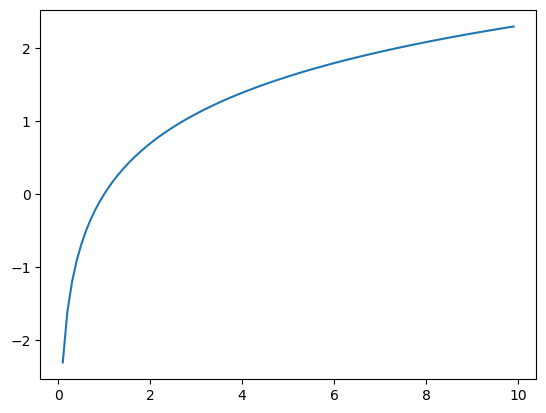

In [9]:
s1 = pd.Series(['apple', 'watermelon', 'orange', 'pear', 'cherry', 'strawberry'],
               index=list("abcdef"))
s2 = pd.Series(['apple', 'kiwi', 'orange', 'pear', 'cherry', 'grape'],
               index=list("abcdef"))
s3 = pd.Series(np.log(np.arange(0.1,10,.1)), index=np.arange(0.1,10,.1))

s4 = np.array([""])

print(s1.unique())
print(s1.count())
print(s1.compare(s2))
print(s1.filter(['a', 'b']))
print(s3.plot())
print(s1.drop(['b', 'f']))
print(s3.apply(lambda x: np.abs(x)))

### Timestamp

In [10]:
dates = pd.Series(['1-4-1988', '1-1-1987', '1-12-2011', '1-6-2005', '1-5-2005'])
tss = pd.to_datetime(dates, format = "%d-%m-%Y")
print(tss.min(), tss.max())
print(tss.sort_values())

1987-01-01 00:00:00 2011-12-01 00:00:00
1   1987-01-01
0   1988-04-01
4   2005-05-01
3   2005-06-01
2   2011-12-01
dtype: datetime64[ns]


## DataFrame
The pandas' DataFrame is a 2-dimensional structure which may be viewed as a collection of Series. It has indices for both dimensions. We will use the terms observations and variables for rows and columns interchangeably. DataFrame, and Series, can hold dimensions > 2 with the so called `hierarchical indexing` which is beyond the scope of this course.

We will be working with homogeneous Series in the context of DataFrames.


In [11]:
df = pd.DataFrame(data = [[3, 'a'], [5, 'b'], [7, 'c']],
                  columns = ['x', 'y']) # list
print(df, end="\n======\n")

df = pd.DataFrame({'x': [3, 5, 7], 'y': ['a', 'b', 'c']}) # dictionary
print(df, end="\n======\n")

df = pd.DataFrame({3:'a', 5:'b', 7:'c'}.items(), columns = ['x', 'y'])
print(df, end="\n======\n")

pd.DataFrame({3:['a'], 5:['b'], 7:['c']})

   x  y
0  3  a
1  5  b
2  7  c
   x  y
0  3  a
1  5  b
2  7  c
   x  y
0  3  a
1  5  b
2  7  c


,3,5,7
0,a,b,c


### DataFrame: read/write

You may want to store or share with others the DataFrame you just created. The most common data formate to store DataFrame is comma-separated-values (csv) format.Use `to_csv` method to export a DataFrame and `pd.read_csv` import:

In [12]:
df = pd.DataFrame({'x': rng.standard_normal(10), "y": rng.standard_normal(10)})
print(df, end = "\n *******")

df.to_csv("df.csv", index = False)
df = pd.read_csv("df.csv")

          x         y
0  0.277438  0.313550
1  0.237896  1.298999
2 -0.116431  0.817551
3 -1.211182  0.987911
4 -0.325379 -0.919543
5 -0.306283  0.365305
6 -1.977685  0.018537
7  0.058411 -0.549395
8  0.370864 -0.612406
9  2.131261 -0.899439
 *******

### Inspect content

In [13]:
print(df.head())
print(df.tail(2))
print(df.head().tail(2))
print(df.shape)
print(df.size) #
print(df.columns) # the columns indices/names
print(df.dtypes) # listing all columns' types
print(df.describe()) # descriptive summary of all variables

          x         y
0  0.277438  0.313550
1  0.237896  1.298999
2 -0.116431  0.817551
3 -1.211182  0.987911
4 -0.325379 -0.919543
          x         y
8  0.370864 -0.612406
9  2.131261 -0.899439
          x         y
3 -1.211182  0.987911
4 -0.325379 -0.919543
(10, 2)
20
Index(['x', 'y'], dtype='object')
x    float64
y    float64
dtype: object
               x          y
count  10.000000  10.000000
mean   -0.086109   0.082107
std     1.071556   0.804700
min    -1.977685  -0.919543
25%    -0.320605  -0.596654
50%    -0.029010   0.166043
75%     0.267553   0.704489
max     2.131261   1.298999


## Select columns
### Single column

You can select a column from a DataFrame using the square bracket `df["column_name"]` or `df.column_name`. When only one column name is given the results is a Series, with a list of columns the result is a DataFreme:

In [14]:
print(df["x"], end="\n*****\n") # Series
print(df.x, end="\n*****\n") # = df["x"], giving Series
df[["x"]] #DataFrame

0    0.277438
1    0.237896
2   -0.116431
3   -1.211182
4   -0.325379
5   -0.306283
6   -1.977685
7    0.058411
8    0.370864
9    2.131261
Name: x, dtype: float64
*****
0    0.277438
1    0.237896
2   -0.116431
3   -1.211182
4   -0.325379
5   -0.306283
6   -1.977685
7    0.058411
8    0.370864
9    2.131261
Name: x, dtype: float64
*****


,x
0,0.277438
1,0.237896
2,-0.116431
3,-1.211182
4,-0.325379
5,-0.306283
6,-1.977685
7,0.058411
8,0.370864
9,2.131261


Only `valid python names` can be accessed through dot `.`:

In [15]:
pd.DataFrame({'valide_name': [1, 2, 3], 'another variable':[3, 2, 1]}).valide_name


0    1
1    2
2    3
Name: valide_name, dtype: int64

## Multiple columns
Use a list of indices to select multiple columns:

In [16]:
print(df[["x", "y"]], end="\n=========\n") # explicit

print(df[df.columns[[0, 1]]]) # use indicies on df.columns

          x         y
0  0.277438  0.313550
1  0.237896  1.298999
2 -0.116431  0.817551
3 -1.211182  0.987911
4 -0.325379 -0.919543
5 -0.306283  0.365305
6 -1.977685  0.018537
7  0.058411 -0.549395
8  0.370864 -0.612406
9  2.131261 -0.899439
          x         y
0  0.277438  0.313550
1  0.237896  1.298999
2 -0.116431  0.817551
3 -1.211182  0.987911
4 -0.325379 -0.919543
5 -0.306283  0.365305
6 -1.977685  0.018537
7  0.058411 -0.549395
8  0.370864 -0.612406
9  2.131261 -0.899439


# Select rows
## Using logical criteria
Similar to NumPy logical masks we can filter out rows for which the logical condition succeeds. A condition on the variables of a DataFrame returns a logical value for each row in a format of a `Series` object:

In [17]:
df = pd.DataFrame({'x': rng.standard_normal(10),
                   'y': rng.standard_normal(10)})
df[((df.x < 0) & (df.y > 0))] 

,x,y
6,-1.442565,0.864168
8,-0.239207,0.836402


## Using index: loc method
Rows in a Dataframe are by default indexed with [0, n). The `DataFrame` method `loc` can be used in the following forms:

- df.loc[<row-label>]: select a row by numeric index
- df.loc[<row-label>, <column-label>]: select the indexed entry

Both row-label and column-label may take values such as, a single lable, list/array of labels, slices, boolean arrays and series. Though these indexing schemes may look similar to NumPy, there are two cautionary remarks:
- The labels are not positional indices.
- The slices used with `.loc` are inclusive of start and stop, i.e., [0, k].


In [18]:
print(df.loc[1], end = "\n ================\n") # [.] row 1 as a Series
print(df.loc[[1]], end = "\n ================\n") # row 1 as a DataFrame
print(df.loc[1, 'x'], end="\n =======\n") #[.,.] labels
print(df.loc[0:3, "x":"y"], end = "\n ======\n") #[.,.] slices
print(df.loc[df.x >df.y, "x"], end="\n=====\n") #[.,.] boolean 

x    1.194739
y   -1.550602
Name: 1, dtype: float64
          x         y
1  1.194739 -1.550602
1.1947389936580952
          x         y
0  0.390223  2.188986
1  1.194739 -1.550602
2  1.615262  0.299944
3  0.769223  0.211648
1    1.194739
2    1.615262
3    0.769223
9    0.853432
Name: x, dtype: float64
=====


$\textbf{iloc}:$ Also take a look at the method `iloc` which is similar to `loc` except it only accepts positional integers or ranges for rows and columns indices

# Update varibales

DataFrame's columns can be updated with an assignment `=` with or with without a row selection, e.g., 

In [19]:
df.x = range(df.shape[0]) # variable size and the new values must match.
df.loc[(df.x % 2 == 0), 'y'] = None # set y values to NaN where x is an event value

In [20]:
df

,x,y
0,0,NaN
1,1,-1.550602
2,2,NaN
3,3,0.211648
4,4,NaN
5,5,-0.210644
6,6,NaN
7,7,1.667563
8,8,NaN
9,9,-0.377827


Value update according to a selection should only be done using `.loc` or (`.iloc`) method. For example both selections below are equivalent but only the `.loc` version can be used in an assignment:

In [21]:
s1 = df[0::2]['y'] # selection with composition (aka chained)
print(s1)

s2 = df.loc[0::2, "y"] # selection with loc
print(s2)

print(s1.equals(s2)) # s1 == s2

#df[0::2]['y'] = -2 # warning
print(df.loc[0::2, 'y'], end = "\n====\n")
df.loc[0::2, 'y'] = -1 # valid
print(df.loc[0::2, 'y'])

0   NaN
2   NaN
4   NaN
6   NaN
8   NaN
Name: y, dtype: float64
0   NaN
2   NaN
4   NaN
6   NaN
8   NaN
Name: y, dtype: float64
True
0   NaN
2   NaN
4   NaN
6   NaN
8   NaN
Name: y, dtype: float64
====
0   -1.0
2   -1.0
4   -1.0
6   -1.0
8   -1.0
Name: y, dtype: float64


# Merge Series and DataFrames
To combine DataFrames use the `pd.concat` function

In [22]:
s1 = pd.Series(list("abcd")) # ['a', 'b', 'c', 'd']
s2 = pd.Series(range(4)) # [0,4)
#print(s1)
#print(s2)

print(pd.concat([s1, s2]), end = "\n=====\n") # Series
print(pd.concat([s1, s2], ignore_index=True), end = "\n=====\n") # Series
print(pd.concat([s1, s2], axis=1), end = "\n=====\n") 

0    a
1    b
2    c
3    d
0    0
1    1
2    2
3    3
dtype: object
=====
0    a
1    b
2    c
3    d
4    0
5    1
6    2
7    3
dtype: object
=====
   0  1
0  a  0
1  b  1
2  c  2
3  d  3
=====


In [23]:
df1 = pd.DataFrame({'a':range(3), "b": list("abc")})
df2 = pd.DataFrame({'c': range(5), 'b': list("abcde"[::-1])})
print(df1, end="\n===\n")
print(df2, end="\n===\n")

print(pd.concat([df1, df2], axis = 0, join = "outer"), end="\n===\n") # along axis 0
print(pd.concat([df1, df2], axis = 1, join = "outer")) # along axis 1


   a  b
0  0  a
1  1  b
2  2  c
===
   c  b
0  0  e
1  1  d
2  2  c
3  3  b
4  4  a
===
     a  b    c
0  0.0  a  NaN
1  1.0  b  NaN
2  2.0  c  NaN
0  NaN  e  0.0
1  NaN  d  1.0
2  NaN  c  2.0
3  NaN  b  3.0
4  NaN  a  4.0
===
     a    b  c  b
0  0.0    a  0  e
1  1.0    b  1  d
2  2.0    c  2  c
3  NaN  NaN  3  b
4  NaN  NaN  4  a


# Add row to DataFrame
For this we can use the `pd.concate` function

In [24]:
df = pd.DataFrame({'Year': [2021, 2021], 'Month': [11, 12], 'Day': [9, 16]})
new_row = pd.DataFrame({'Year': [2023], 'Month': [3], 
                        'Day': [20]})
pd.concat([df, new_row])

,Year,Month,Day
0,2021,11,9
1,2021,12,16
0,2023,3,20


# Missing values
Recall the specical values None and NaN from the lectures representing no value and not a number. They are of different types and have different properties. In the context of DataFrames we have the notion of missing values, and they can be represented by both `NaN` and `None` types

In [25]:
s = pd.Series(["0", float("nan"), np.nan, 2, None])
print(s)
[type(v) for v in s]

0       0
1     NaN
2     NaN
3       2
4    None
dtype: object


[str, float, float, int, NoneType]

# Handling missing data
Possible actions when dealing with missing data are *summarise*, *remove* or *replace* missing values.

To be able to do any action on missing values you'll need to first find them. DataFrame and Series have the methods `isna` and `isnull` (alias to `isna`) for finding missing values. Both return a logical mask with `True` marking the location of the missing values. We will use `isna` throughout the lectures

In [26]:
print(s)
print(s.isna()) # iisna: boolean marking missing values
s[s.notna()] # = s[~s.isna()]

0       0
1     NaN
2     NaN
3       2
4    None
dtype: object
0    False
1     True
2     True
3    False
4     True
dtype: bool


0    0
3    2
dtype: object

With `dropna` you may discard all missing from a Series object. \
With DataFrames you'll have more control in how to discard the missing

In [27]:
sample_space = np.arange(10)
print(sample_space, end = "\n=====\n")
sample_space = np.arange(10).tolist()
print(sample_space, end = "\n=====\n")
sample_space = np.arange(10).tolist() + ([np.nan]*2)
print(sample_space, end = "\n=====\n")

[0 1 2 3 4 5 6 7 8 9]
=====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
=====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, nan, nan]
=====


In [28]:
df = pd.DataFrame(rng.choice(sample_space, 25))
#print(df, end="\n===\n")
df = pd.DataFrame(rng.choice(sample_space, 25).reshape(5, 5))
print(df, end="\n===\n")

     0    1    2    3    4
0  6.0  9.0  NaN  NaN  2.0
1  6.0  4.0  6.0  1.0  1.0
2  3.0  4.0  0.0  0.0  0.0
3  2.0  NaN  3.0  NaN  5.0
4  5.0  NaN  6.0  5.0  9.0
===


In [29]:
print(df.dropna(axis = 0), end = "\n====\n") # default: drop rpws having any missing values
print(df.dropna(axis = 1), end = "\n====\n") # drop columns having any missing values
print(df.dropna(axis = 1, how = "all"), end = "\n====\n") # drop columns having only missing values

     0    1    2    3    4
1  6.0  4.0  6.0  1.0  1.0
2  3.0  4.0  0.0  0.0  0.0
====
     0    4
0  6.0  2.0
1  6.0  1.0
2  3.0  0.0
3  2.0  5.0
4  5.0  9.0
====
     0    1    2    3    4
0  6.0  9.0  NaN  NaN  2.0
1  6.0  4.0  6.0  1.0  1.0
2  3.0  4.0  0.0  0.0  0.0
3  2.0  NaN  3.0  NaN  5.0
4  5.0  NaN  6.0  5.0  9.0
====


With `fillna` we can replace the missing with values, either fixed or a set of values (Series, DataFrame etc.) according to the indices. We only illustrate scalars here

In [30]:
print(df.fillna(0), end = "\n=====\n")
print(df.fillna(df.mean(axis = 0)))

     0    1    2    3    4
0  6.0  9.0  0.0  0.0  2.0
1  6.0  4.0  6.0  1.0  1.0
2  3.0  4.0  0.0  0.0  0.0
3  2.0  0.0  3.0  0.0  5.0
4  5.0  0.0  6.0  5.0  9.0
=====
     0         1     2    3    4
0  6.0  9.000000  3.75  2.0  2.0
1  6.0  4.000000  6.00  1.0  1.0
2  3.0  4.000000  0.00  0.0  0.0
3  2.0  5.666667  3.00  2.0  5.0
4  5.0  5.666667  6.00  5.0  9.0


# Group operations
When the data has categorical variables we may be interested in descriptive statistics on each group. This can be done by first grouping the data with `groupby` method and then summarise on those groups. I'll use th [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) datatset for illustration

In [32]:

diamonds = pd.read_csv("data/diamonds.csv") # read diamonds.csv
print(diamonds.head(), end = "\n=====\n")
print(diamonds[diamonds.columns.drop(['color'])].head(), end = "\n=====\n")
grp = diamonds[diamonds.columns.drop(['color'])].groupby(['cut', 'clarity'], as_index=False) #
print(grp.head(), end = "\n=====\n")

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
=====
   carat      cut clarity  depth  table  price     x     y     z
0   0.23    Ideal     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     SI2   63.3   58.0    335  4.34  4.35  2.75
=====
       carat      cut clarity  depth  table  price     x     y     z
0       0.23    Ideal     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21  Premium     SI1   59

In [33]:
print(grp.indices)


{('Fair', 'I1'): array([  241,   369,   376,   967,  1199,  1362,  1412,  1527,  1597,
        1598,  1599,  2366,  3955,  4779,  4970,  4971,  5014,  5145,
        6933,  6956,  7105,  7703,  7773,  7954,  8186,  8392,  9676,
        9677,  9956,  9981,  9982, 10709, 10936, 11128, 11129, 11583,
       11744, 11778, 12423, 12618, 13002, 13118, 13222, 13562, 13757,
       13775, 13848, 13929, 13991, 13992, 14138, 14172, 14504, 14645,
       14881, 14912, 14913, 15313, 15684, 15781, 15815, 15865, 15866,
       15940, 16084, 16256, 16327, 16439, 16504, 16505, 16637, 16915,
       17024, 17097, 17181, 17196, 17222, 17481, 17560, 17691, 17717,
       17719, 17956, 17960, 18067, 19081, 19183, 19346, 19406, 20297,
       20462, 21711, 21712, 21758, 22004, 22540, 22741, 23644, 26431,
       27130, 27415, 27630, 29444, 29929, 30340, 30341, 33329, 35231,
       35232, 35486, 36572, 36817, 36818, 36819, 36820, 36821, 37303,
       37675, 37676, 37677, 37813, 38173, 38840, 39060, 39222, 39306,
   

In [34]:
print(grp.ngroups)


40


In [35]:
df = grp.mean()
df

,cut,clarity,carat,depth,table,price,x,y,z
0,Fair,I1,1.361000,65.699048,58.114286,3703.533333,6.723000,6.624238,4.386905
1,Fair,IF,0.474444,60.066667,59.111111,1912.333333,5.050000,5.050000,3.033333
2,Fair,SI1,0.964632,63.910294,59.126961,4208.279412,6.127230,6.071985,3.895711
3,Fair,SI2,1.203841,64.421888,58.828326,5173.916309,6.570343,6.503927,4.211867
4,Fair,VS1,0.879824,62.945294,60.365294,4165.141176,5.932353,5.864059,3.709882
5,Fair,VS2,0.885249,63.637548,59.050958,4174.724138,5.966590,5.907011,3.780230
6,Fair,VVS1,0.664706,60.417647,61.235294,3871.352941,5.503529,5.508824,3.327647
7,Fair,VVS2,0.691594,62.847826,59.237681,3349.768116,5.495507,5.464638,3.444058
8,Good,I1,1.203021,62.067708,59.497917,3596.635417,6.651562,6.614792,4.065625
9,Good,IF,0.616338,61.440845,59.056338,4098.323944,5.278310,5.315070,3.252958


In [38]:
diamonds.clarity.unique()
diamonds.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

# Exercise 

In [39]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
rng = default_rng

## Series
Given the Series below:

In [41]:
s = pd.Series(np.arange(5), index=list("abcde"))
s

a    0
b    1
c    2
d    3
e    4
dtype: int32

Without entering the statements:
- predict the values and the type of object returned for each statement

In [51]:
print(s['d'], end = "\n=========\n") # 3 -> number
print(s['b':'d'], end = "\n=========\n") # -> number
print(s[2::2], end = "\n=========\n") 
print(s[2::2][::-1], end = "\n=========\n") 
print(s[['b', 'a']], end = "\n=========\n") # -> series

3
b    1
c    2
d    3
dtype: int32
c    2
e    4
dtype: int32
e    4
c    2
dtype: int32
b    1
a    0
dtype: int32


- Predict the contents of `s`, `s1` and `1st`:

In [64]:
lst, idx = np.arange(5), list("abcde")
s = pd.Series(lst,idx); print(s)
s[-1:] = 10; print(s)               # ...
lst[0] = 5; print(s)               # ...
s1 = pd.Series(s.copy()); print(s1)  # ...
s1[0] = -1; print(s1); print(s)

a    0
b    1
c    2
d    3
e    4
dtype: int32
a     0
b     1
c     2
d     3
e    10
dtype: int32
a     5
b     1
c     2
d     3
e    10
dtype: int32
a     5
b     1
c     2
d     3
e    10
dtype: int32
a    -1
b     1
c     2
d     3
e    10
dtype: int32
a     5
b     1
c     2
d     3
e    10
dtype: int32


- predict the result of the operatons

In [71]:
s1 = pd.Series({'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4})
s2 = pd.Series({'d': 0, 'e': 1, 'f': 2, 'g': 3})

s1 + s2

a    NaN
b    NaN
c    NaN
d    3.0
e    5.0
f    NaN
g    NaN
dtype: float64

In [72]:
print(s1[3:])
print(s2[:-2])

d    3
e    4
dtype: int64
d    0
e    1
dtype: int64


In [74]:
s1[3:] * s2[:-2]

d    0
e    4
dtype: int64

## DataFrame
Given the DataFrame `df` below:

In [75]:
rng = default_rng(1234)
df = pd.DataFrame(np.array(rng.standard_normal(25)).reshape(5,5),
             index=[1, 0, 4, 3, 2], columns=list("abcde"))
df

,a,b,c,d,e
1,-1.603837,0.064100,0.740891,0.152619,0.863744
0,2.913099,-1.478823,0.945473,-1.666135,0.343745
4,-0.512444,1.323759,-0.860280,0.519493,-1.265144
3,-2.159139,0.434734,1.733289,0.520134,-1.002166
2,0.268346,0.767175,1.191272,-1.157411,0.696279


Retrieve:
- 2nd row as a Series
- 3rd row as a DataFrame
- rows on even positions
- rows with even indices
- 3d column
- odd (index) rows and columns 'b' to 'd'

In [96]:
# 2nd row as a Series
df.loc[2]
# 3rd row as a DataFrame
df.loc[[3]]
# rows on even positions
df.loc[0::2]
# rows with even indices
df.loc[(df.index % 2 != 0)]
# 3rd column
df[df.columns[[2]]]
# odd (index) rows and columns 'b' to 'd'
df.loc[(df.index % 2 == 0), ['b', 'd']]

,b,d
0,-1.478823,-1.666135
4,1.323759,0.519493
2,0.767175,-1.157411


## Merge DataFrames
Given `df1`, `df2` and `df3` apply the following:
- merge df1 and df2 side by side
- merge df1 and df3 stacked
- merge all and reset index

In [97]:
df1 = pd.DataFrame({'name': ['ants', 'bees','wasps'] , 'order':['Hymenoptera']*3})
df2 = pd.DataFrame({'name': ['beetles', 'weevils'] , 'order':['Coleoptera']*2})
df3 = pd.DataFrame({'name': ['butterflies', 'moths'], 'order':['Lepidoptera']*2 })

In [102]:
# Merge df1 and df2 side by side
pd.concat([df1, df2], axis = 1)
# merge df1 and df3 stacked
pd.concat([df1, df2], axis = 0)
# merge all and reset index
pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

,name,order
0,ants,Hymenoptera
1,bees,Hymenoptera
2,wasps,Hymenoptera
3,beetles,Coleoptera
4,weevils,Coleoptera
5,butterflies,Lepidoptera
6,moths,Lepidoptera


## Missing values
Given the following DataFrame, set the values to NaN as such to reproduce the following DatFrame

In [105]:
df = pd.DataFrame(np.arange(25).reshape(5,5))
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


## Natural gas consumption in the Netherlands
The dataset can be downloaded from CBS Open data StatLine. A version is already included in the data directory of this session's git repository. We will be using this dataset in the exercises to prepare for visualisation later on in the course.

We first read the data with `pd.read_csv`. Here we only select the columns `Periods` and `TotalSupply_1`:


In [107]:
cbs = pd.read_csv("data/00372eng_UntypedDataSet_17032023_161051.csv",sep=";")
df0 = cbs[['Periods','TotalSupply_1']].copy()
df0.head()

,Periods,TotalSupply_1
0,1946JJ00,0
1,1947JJ00,1
2,1948JJ00,5
3,1949JJ00,7
4,1950JJ00,5


The column `Periods` has the year (yyyy) followed by a tage {JJ, KW, MM} representing the yearly, quarterly and monthly terms respectivly, and finally ending with two digits`00..12`. The two digit followed by the tags have different meaning per tag. For JJ it is always `00`, MM with `00..12` for 12 months and `KW` with `01..04` for four quarters. The column `TotaalAanbod_1` holds the natural gas consumption (MCM).

In order to get more control over the date ranges we will need to split the string based on the patter `YYYY{MM, KW, JJ}{00, ..., 12}`. The Series class has a comprehensive set of submodules, one of which being `pandas.Series.str` with the method `split`. The `split` method takes a regular expression decribing the pattern and splits the string based on the pattern. Regular expressions fall beyond the scope of this courses, therefore the solution is given here for the exercise.

In [109]:
df = df0.Periods.str.split(r'(JJ|MM|KW)', regex=True, expand=True)  # expand=True forces the result into
                                                                        # a DataFrame
df

,0,1,2
0,1946,JJ,00
1,1947,JJ,00
2,1948,JJ,00
3,1949,JJ,00
4,1950,JJ,00
...,...,...,...
730,2022,MM,12
731,2022,KW,04
732,2022,JJ,00
733,2023,MM,01


In [110]:
df = pd.DataFrame({'year': df[0].astype(int),                 # Create DataFrame {year,term,idx}
                        'term': df[1],
                        'idx': df[2].astype(int)})
df


,year,term,idx
0,1946,JJ,0
1,1947,JJ,0
2,1948,JJ,0
3,1949,JJ,0
4,1950,JJ,0
...,...,...,...
730,2022,MM,12
731,2022,KW,4
732,2022,JJ,0
733,2023,MM,1


In [112]:
df = pd.concat([df,cbs[['TotalSupply_1']]],axis=1)
df

,year,term,idx,TotalSupply_1,TotalSupply_1
0,1946,JJ,0,0,0
1,1947,JJ,0,1,1
2,1948,JJ,0,5,5
3,1949,JJ,0,7,7
4,1950,JJ,0,5,5
...,...,...,...,...,...
730,2022,MM,12,3812,3812
731,2022,KW,4,8521,8521
732,2022,JJ,0,31227,31227
733,2023,MM,1,3386,3386


1. Write a function given a Series with {year, term, idx} returns a timestamp according to the following specification:
